In [1]:
import battleship as ship
import genetic_algorithm as ga

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Correct number of pieces on board
0000000000010000000001000000000100000000010000011101000001000000000100000000000000000011110000111000


Text(0.5, 1.0, 'Battleship Board')

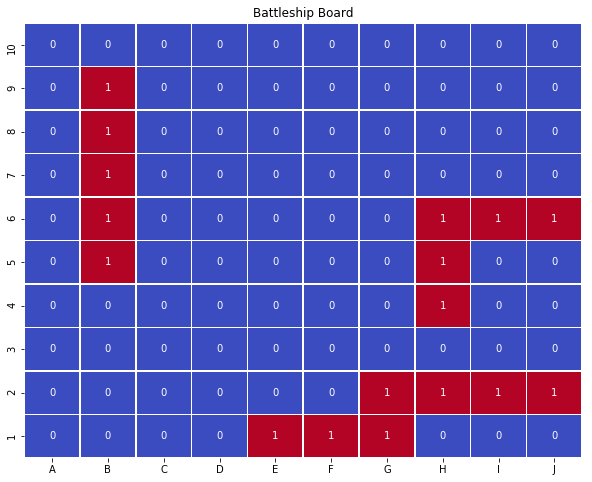

In [2]:
#create a new board and solution
board, solution = ship.new_board()

# print the genetic solution
print(solution)

# add the board to a dataframe for plotting
df = pd.DataFrame(board, columns=['A','B','C','D','E','F','G','H','I','J',])
df['ylabel'] = range(10,0,-1)
df = df.set_index('ylabel')

# print the board using a heatmap
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
sns.heatmap(df, cmap='coolwarm', linewidths=0.5, annot=True, fmt='d', cbar=False)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_title('Battleship Board')

In [3]:
# initialize the first random generation
generation_size = 10
gene_pool = ga.random_generation(generation_size, 100)

# compare fitness
gene_pool['Fitness'] = gene_pool.apply(lambda row: ship.accuracy(row.Chromosome, solution), axis=1)

# assign elites with elite rate
elite_rate = 0.20
gene_pool = ga.assign_elites(gene_pool, elite_rate)
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
0,1,0110000011110001011100101111110010001010010000...,1,Random,0.57,0,True
9,10,0010100001010011011101011100000000101100001101...,1,Random,0.57,0,True
6,7,0011111110110011001101111011010000001111010011...,1,Random,0.55,0,False
5,6,1010111001110011100000010000000001011100111000...,1,Random,0.54,0,False
8,9,1110111100101001110100000011000000010001001110...,1,Random,0.51,0,False
2,3,1010001011001011100010001011010101001111111101...,1,Random,0.50,0,False
3,4,1011100111100011111011111101001010100101100110...,1,Random,0.48,0,False
7,8,0111100101101101001011101010001000111000111011...,1,Random,0.48,0,False
4,5,0101000100101011111010001100100010100010101001...,1,Random,0.47,0,False
1,2,0000011011001110111011010000111011001010101101...,1,Random,0.43,0,False


In [4]:
gene_pool.describe()

,Fitness
count,10.000000
mean,0.510000
std,0.046667
min,0.430000
25%,0.480000
50%,0.505000
75%,0.547500
max,0.570000


In [5]:
gene_pool = ga.create_descendents(gene_pool, elite_rate, solution, 1.0)

1: 0.57
2: 0.61
3: 0.64
4: 0.64
5: 0.65
6: 0.65
7: 0.65
8: 0.65
9: 0.65
10: 0.65
11: 0.67
12: 0.68
13: 0.7
14: 0.7
15: 0.7
16: 0.72
17: 0.73
18: 0.73
19: 0.73
20: 0.73
21: 0.73
22: 0.73
23: 0.73
24: 0.73
25: 0.73
26: 0.73
27: 0.73
28: 0.73
29: 0.74
30: 0.74
31: 0.74
32: 0.76
33: 0.76
34: 0.78
35: 0.79
36: 0.79
37: 0.79
38: 0.79
39: 0.8
40: 0.8
41: 0.8
42: 0.82
43: 0.83
44: 0.85
45: 0.85
46: 0.85
47: 0.85
48: 0.86
49: 0.86
50: 0.86
51: 0.87
52: 0.87
53: 0.87
54: 0.87
55: 0.87
56: 0.87
57: 0.87
58: 0.88
59: 0.88
60: 0.88
61: 0.89
62: 0.89
63: 0.89
64: 0.9
65: 0.9
66: 0.9
67: 0.91
68: 0.91
69: 0.91
70: 0.91
71: 0.91
72: 0.91
73: 0.91
74: 0.91
75: 0.91
76: 0.91
77: 0.91
78: 0.91
79: 0.91
80: 0.91
81: 0.92
82: 0.92
83: 0.92
84: 0.93
85: 0.93
86: 0.95
87: 0.95
88: 0.96
89: 0.96
90: 0.96
91: 0.96
92: 0.96
93: 0.96
94: 0.96
95: 0.96
96: 0.96
97: 0.96
98: 0.96
99: 0.96
100: 0.96
101: 0.96
102: 0.96
103: 0.96
104: 0.96
105: 0.96
106: 0.96
107: 0.96
108: 0.97
109: 0.97
110: 0.97
111: 0.97
112: 0.

In [6]:
gene_pool

,Sequence,Chromosome,Generation,Birth,Fitness,Parents,Elite
0,1,0110000011110001011100101111110010001010010000...,1,Random,0.57,0,True
9,10,0010100001010011011101011100000000101100001101...,1,Random,0.57,0,True
6,7,0011111110110011001101111011010000001111010011...,1,Random,0.55,0,False
5,6,1010111001110011100000010000000001011100111000...,1,Random,0.54,0,False
8,9,1110111100101001110100000011000000010001001110...,1,Random,0.51,0,False
2,3,1010001011001011100010001011010101001111111101...,1,Random,0.50,0,False
3,4,1011100111100011111011111101001010100101100110...,1,Random,0.48,0,False
7,8,0111100101101101001011101010001000111000111011...,1,Random,0.48,0,False
4,5,0101000100101011111010001100100010100010101001...,1,Random,0.47,0,False
1,2,0000011011001110111011010000111011001010101101...,1,Random,0.43,0,False


In [7]:
gene_pool.groupby('Generation').describe()

Fitness                                                    
             count   mean       std   min     25%    50%     75%   max
Generation                                                            
1             10.0  0.510  0.046667  0.43  0.4800  0.505  0.5475  0.57
2             10.0  0.553  0.031640  0.49  0.5350  0.560  0.5675  0.61
3             10.0  0.573  0.062370  0.41  0.5625  0.590  0.6000  0.64
4             10.0  0.585  0.077496  0.43  0.6100  0.610  0.6275  0.64
5             10.0  0.606  0.073212  0.44  0.6325  0.640  0.6400  0.65
6             10.0  0.611  0.068060  0.46  0.6250  0.640  0.6500  0.65
7             10.0  0.619  0.060636  0.49  0.6400  0.650  0.6500  0.65
8             10.0  0.611  0.072488  0.46  0.6300  0.650  0.6500  0.65
9             10.0  0.618  0.064944  0.49  0.6425  0.650  0.6500  0.65
10            10.0  0.624  0.062574  0.45  0.6350  0.650  0.6500  0.65
11            10.0  0.628  0.059404  0.47  0.6425  0.650  0.6500  0.67
12            10.0  0.638  0.045656  0.55  0.6400  0.655  0.6675  0.68
13            10.0  0.644  0.068993  0.48  0.6600  0.670  0.6800  0.70
14            10.0  0.656  0.071368  0.49  0.6800  0.685  0.6900  0.70
15            10.0  0.665  0.072610  0.50  0.6925  0.700  0.7000  0.70
16            10.0  0.661  0.087743  0.49  0.7000  0.700  0.7000  0.72
17            10.0  0.658  0.118958  0.38  0.6925  0.710  0.7200  0.73
18            10.0  0.699  0.052589  0.57  0.7125  0.720  0.7275  0.73
19            10.0  0.666  0.123756  0.36  0.6975  0.720  0.7300  0.73
20            10.0  0.695  0.071375  0.55  0.7225  0.730  0.7300  0.73
21            10.0  0.691  0.082926  0.48  0.7200  0.730  0.7300  0.73
22            10.0  0.683  0.092502  0.46  0.7125  0.725  0.7300  0.73
23            10.0  0.682  0.093547  0.50  0.7125  0.730  0.7300  0.73
24            10.0  0.671  0.114061  0.45  0.7125  0.725  0.7300  0.73
25            10.0  0.680  0.105830  0.46  0.7300  0.730  0.7300  0.73
26            10.0  0.685  0.094898  0.50  0.7300  0.730  0.7300  0.73
27            10.0  0.684  0.096747  0.46  0.7225  0.730  0.7300  0.73
28            10.0  0.664  0.132430  0.38  0.7125  0.730  0.7300  0.73
29            10.0  0.690  0.087305  0.51  0.7300  0.730  0.7300  0.74
30            10.0  0.685  0.098686  0.47  0.7225  0.730  0.7300  0.74
...            ...    ...       ...   ...     ...    ...     ...   ...
200           10.0  0.889  0.198352  0.44  0.9625  0.980  0.9900  0.99
201           10.0  0.875  0.231769  0.37  0.9700  0.985  0.9900  0.99
202           10.0  0.888  0.210016  0.47  0.9800  0.990  0.9900  0.99
203           10.0  0.894  0.192481  0.50  0.9725  0.985  0.9900  0.99
204           10.0  0.879  0.230239  0.39  0.9800  0.990  0.9900  0.99
205           10.0  0.894  0.200898  0.47  0.9825  0.990  0.9900  0.99
206           10.0  0.898  0.189725  0.50  0.9750  0.990  0.9900  0.99
207           10.0  0.878  0.226215  0.42  0.9650  0.990  0.9900  0.99
208           10.0  0.895  0.197723  0.51  0.9825  0.990  0.9900  0.99
209           10.0  0.888  0.203131  0.46  0.9700  0.985  0.9900  0.99
210           10.0  0.886  0.221721  0.40  0.9900  0.990  0.9900  0.99
211           10.0  0.894  0.190799  0.49  0.9575  0.990  0.9900  0.99
212           10.0  0.886  0.209295  0.46  0.9725  0.985  0.9900  0.99
213           10.0  0.888  0.199989  0.48  0.9625  0.985  0.9900  0.99
214           10.0  0.889  0.210790  0.46  0.9825  0.990  0.9900  0.99
215           10.0  0.887  0.210135  0.45  0.9800  0.985  0.9900  0.99
216           10.0  0.890  0.192815  0.51  0.9625  0.980  0.9900  0.99
217           10.0  0.884  0.213916  0.44  0.9700  0.990  0.9900  0.99
218           10.0  0.899  0.189470  0.52  0.9825  0.990  0.9900  0.99
219           10.0  0.894  0.189748  0.51  0.9700  0.985  0.9900  0.99
220           10.0  0.886  0.214227  0.46  0.9800  0.990  0.9900  0.99
221           10.0  0.884  0.213031  0.48  0.9725  0.985  0.9900  0.99
222           10.0  0.887  0.214841